### How does the popularity of authors within a playlist affect the popularity of the playlist itself?

In [121]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import scipy.stats as stats


In [2]:
with open('mappings/Q2/playlist_data.pkl', 'rb') as fp:
    playlist_data = pickle.load(fp)

### Total Artist Popularity vs Followers

In [3]:
tap_pop = []
for k,v in playlist_data.items():
    pop_data = v[0]
    total_pop = 0
    authors = 0
    for pop, auth in pop_data:
        total_pop += pop
        authors += auth
    followers = v[1]
    tap_pop.append((total_pop/authors, followers))
        
#     total_pop = sum([x[0] for x in pop_data])
#     authors = sum([x[1] for x in pop_data])
#     tap_pop.append((total_pop/authors, followers))

In [4]:
tap_pop[:2]

[(33.35849056603774, 1), (78.19594594594595, 1)]

In [106]:
tap = np.asarray(tap_pop)

In [6]:
tap_pop[:3]

array([[33.35849057,  1.        ],
       [78.19594595,  1.        ],
       [74.58267717,  1.        ]])

In [7]:
np.max(tap_pop, axis=0)

array([   97.23809524, 71643.        ])

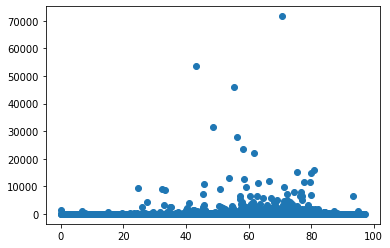

In [16]:
plt.scatter(tap_pop[:,0], tap_pop[:,1])

In [22]:
np.histogram(tap_pop[:,0], bins=10)

(array([   212,    831,   2976,  10751,  39805, 117978, 252558, 391090,
        177078,   6721]),
 array([ 0.        ,  9.72380952, 19.44761905, 29.17142857, 38.8952381 ,
        48.61904762, 58.34285714, 68.06666667, 77.79047619, 87.51428571,
        97.23809524]))

In [38]:
bins = list(range(0,101,1))

(array([1.1000e+01, 9.0000e+00, 9.0000e+00, 1.7000e+01, 3.0000e+01,
        1.8000e+01, 2.8000e+01, 2.7000e+01, 3.4000e+01, 4.1000e+01,
        5.2000e+01, 3.5000e+01, 4.8000e+01, 5.1000e+01, 8.1000e+01,
        1.0600e+02, 1.1500e+02, 1.1900e+02, 1.4100e+02, 1.5100e+02,
        1.6900e+02, 1.9500e+02, 2.4100e+02, 2.6200e+02, 3.1100e+02,
        3.3200e+02, 3.7300e+02, 4.0700e+02, 5.2200e+02, 5.5700e+02,
        6.1200e+02, 7.1700e+02, 8.7700e+02, 9.1700e+02, 1.1090e+03,
        1.2650e+03, 1.4210e+03, 1.7050e+03, 1.8340e+03, 2.1440e+03,
        2.5290e+03, 2.9280e+03, 3.1490e+03, 3.6660e+03, 4.3050e+03,
        4.8690e+03, 5.5270e+03, 6.1140e+03, 7.0490e+03, 7.7320e+03,
        8.7720e+03, 9.5580e+03, 1.0625e+04, 1.1893e+04, 1.2883e+04,
        1.4360e+04, 1.5861e+04, 1.7241e+04, 1.8772e+04, 2.0593e+04,
        2.2077e+04, 2.3370e+04, 2.4711e+04, 2.6063e+04, 2.7474e+04,
        2.9169e+04, 3.1017e+04, 3.3034e+04, 3.5779e+04, 3.8482e+04,
        4.1129e+04, 4.2716e+04, 4.3047e+04, 4.18

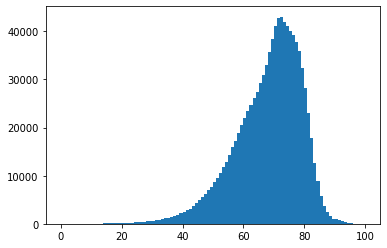

In [39]:
plt.hist(tap_pop[:,0], bins)

In [46]:
mask = [65 <= x and x <= 80 for x in tap_pop[:,0]]

In [47]:
mask

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 

In [48]:
mtp = tap_pop[mask]

In [49]:
mtp

array([[78.19594595,  1.        ],
       [74.58267717,  1.        ],
       [72.89041096,  1.        ],
       ...,
       [78.4950495 ,  2.        ],
       [78.47761194,  1.        ],
       [68.85      ,  2.        ]])

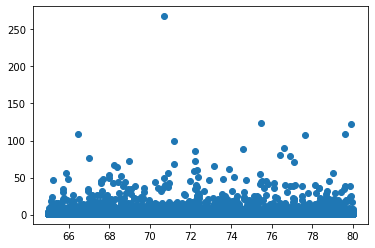

In [52]:
plt.scatter(mtp[:,0], np.sqrt(mtp[:,1]))

In [107]:
def plot_range(a,b):
    mask = [a <= x and x <= b for x in tap[:,0]]
    mtp = tap[mask]
    plt.scatter(mtp[:,0], np.sqrt(mtp[:,1]))

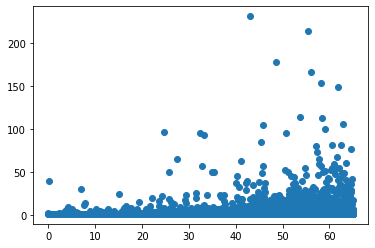

In [54]:
plot_range(0,65)

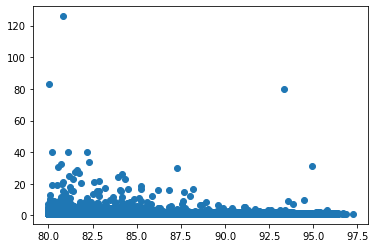

In [55]:
plot_range(80,100)

In [58]:
np.max(tap_pop, axis=0)

array([   97.23809524, 71643.        ])

In [59]:
np.min(tap_pop, axis=0)

array([0., 1.])

In [65]:
mask = [x >= 100 for x in tap_pop[:,1]]

In [66]:
m = tap_pop[mask]

In [67]:
len(m)

822

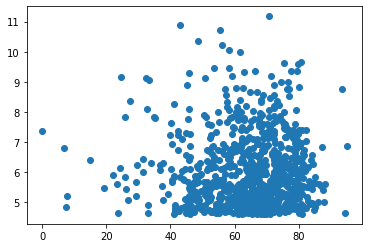

In [70]:
plt.scatter(m[:,0], np.log(m[:,1]))

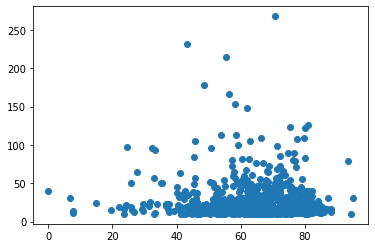

In [100]:
mask = [x >= 100 for x in tap_pop[:,1]]
m = tap_pop[mask]
plt.scatter(m[:,0], np.sqrt(m[:,1]))


In [92]:
x = m[:,1]

In [98]:
np.histogram(x)

(array([796,  16,   3,   3,   1,   0,   1,   1,   0,   1]),
 array([  100. ,  7254.3, 14408.6, 21562.9, 28717.2, 35871.5, 43025.8,
        50180.1, 57334.4, 64488.7, 71643. ]))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  100. ,  7254.3, 14408.6, 21562.9, 28717.2, 35871.5, 43025.8,
        50180.1, 57334.4, 64488.7, 71643. ]),
 <BarContainer object of 10 artists>)

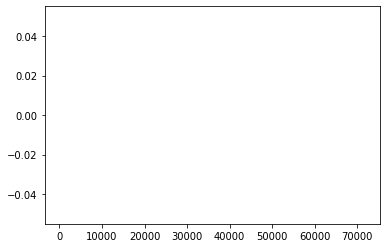

In [99]:
plt.hist(tap_pop[:,0], bins)

In [ ]:
def t_test(sample1, sample2):
    

In [89]:
# make lin regression test for pop 40-80
# make goodness of fit test for f = 1

In [112]:
tap = np.asarray(tap_pop)

### TAP vs num_playlists

Text(0.5, 1.0, 'TAP vs Number of Playlists')

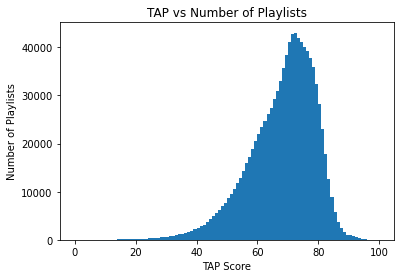

In [214]:
bins = list(range(0,101,1))
plt.hist(tap_pop[:,0], bins)
plt.xlabel('TAP Score')
plt.ylabel('Number of Playlists')
plt.title('TAP vs Number of Playlists')

### t-test conditional on followers

In [202]:
m1 = [x == 1 for x in tap[:,1]]
m2 = [x != 1 for x in tap[:,1]]

In [203]:
g1 = tap[m1]
g2 = tap[m2]
print(np.var(g1), np.var(g2), np.var(g2)/np.var(g1))

1188.591181889649 34734.75522759918 29.223467039673874


In [209]:
t, p = stats.ttest_ind(a=g1, b=g2, axis=0, equal_var=False, alternative='less', trim=0)
print(t,p)

[  4.49265479 -12.40284377] [9.99996482e-01 1.29216724e-35]


In [123]:
np.mean(g1)

34.603439812546334

In [124]:
np.mean(g2)

37.79757191972047

In [181]:
len(g1)/len(tap)

0.754219

### (TAP >= 90 vs num_followers)

In [157]:
m = [x[0] >= 90 and x[1] > 1 for x in tap]

In [158]:
g = tap[m]

In [159]:
len(g)

494

In [213]:
print(np.mean(g[:,0]), np.var(g[:,0]))

92.0004912902595 2.2674164514168953


In [212]:
print(np.mean(g[:,1]), np.var(g[:,1]))

18.062753036437247 82934.91306610499


In [176]:
stats.pearsonr(g[:,0], g[:,1])

(0.055289549154289276, 0.21993649444052968)